## Import Package

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
image = files.upload()

Saving cutest-baby-animals-11.jpg to cutest-baby-animals-11.jpg


In [ ]:
original_image = cv2.imread('cutest-baby-animals-11.jpg', cv2.IMREAD_GRAYSCALE)

## Noise Models

In [ ]:
import cv2
import numpy as np
from scipy import ndimage

def add_gaussian_noise(image, mean=0, sigma=25):
    # Mengkonversi gambar ke float
    image_float = image.astype(float)

    # Membuat noise Gaussian
    noise = np.random.normal(mean, sigma, image.shape)

    # Menambahkan noise ke gambar
    noisy_image = image_float + noise

    # Memastikan nilai pixel tetap dalam range yang valid (0-255)
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image.astype(np.uint8)

def apply_median_filter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

def apply_mean_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    return cv2.filter2D(image, -1, kernel)

def apply_weighted_mean_filter(image, kernel_size, sigma):
    # Membuat Gaussian kernel
    x, y = np.meshgrid(np.linspace(-1, 1, kernel_size), np.linspace(-1, 1, kernel_size))
    d = np.sqrt(x*x + y*y)
    kernel = np.exp(-(d**2 / (2.0 * sigma**2)))

    # Normalisasi kernel
    kernel = kernel / kernel.sum()

    return cv2.filter2D(image, -1, kernel)

In [ ]:
noise_sigma=50
kernel_size=7
sigma=0.8

In [ ]:
# Tambahkan noise
noisy = add_gaussian_noise(original_image, sigma=noise_sigma)

# Terapkan filter
median_filtered = apply_median_filter(noisy, kernel_size)
mean_filtered = apply_mean_filter(noisy, kernel_size)
weighted_mean_filtered = apply_weighted_mean_filter(noisy, kernel_size, sigma)

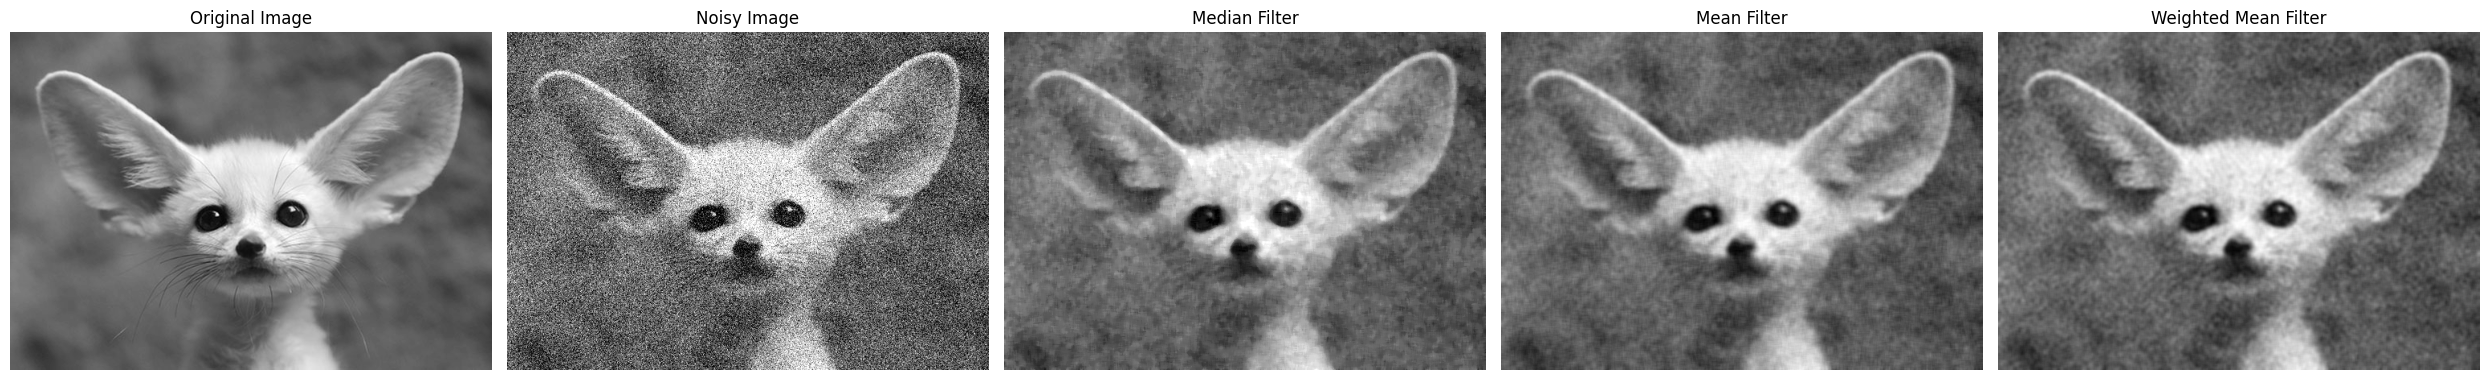

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(noisy, cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].axis('off')

axes[2].imshow(median_filtered, cmap='gray')
axes[2].set_title('Median Filter')
axes[2].axis('off')

axes[3].imshow(mean_filtered, cmap='gray')
axes[3].set_title('Mean Filter')
axes[3].axis('off')

axes[4].imshow(weighted_mean_filtered, cmap='gray')
axes[4].set_title('Weighted Mean Filter')
axes[4].axis('off')

plt.tight_layout()
plt.show()